- problem scoping
    - what we do about the data

    - data -> 
        - acquisition - kaggle, gov websites, UN websites, github , UCi etc
        - API - application programming interface
        - EDA

    - Split ->
        - Train
        - Test split
            - 80:20 , 70:30

    - modeling ->
        - choose a model
            - linear regression
            - logistic regression
            - decision tree
            - K means 
            - Random forest

    - Training ->
        - train/test split
        - Training model ---> model   (model Training)
        - testing ---> model ----> predictions

    - Test ->
        - make prediction on the test (inferences)
        - compute performance (accuracy & etc)

    - Improve performance -->
        - change the split ratio
        - change the model hyper parameters 
        - try different model 
        - EDA again, check whether  data is perfect for the model
        - data acquisition again,  add more data, or replace the data set



-----

## predict the house price based on house parameters
1. various house parameters
    - the problem is worth solving because the flowers species are very hard to identify, even for experts

2. data acquisition
    -  use the inbuilt sci-kit learn from datasets

3. EDA 
    - Clean dataset - it is clean already - but still just recall a bit about cleaning techniques
    - visualise

4. choose model
    - look into the data and we infer that it is a classification problems
    - next iteration, logistic regression( we will observe this model too) . it works on classifications problem too.

5. Training
    - Train test split of 8:2
    - fit data into the model, model learns the patterns in data

6. Testing
    - make predictions
    - observe performance using metrics
    - regression evalution metrics - r2 score and mean absolute error

datasets: [scikit_learn](https://scikit-learn.org/stable/api/sklearn.datasets.html)

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [4]:
housing_data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [5]:
housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
# import
df = pd.DataFrame(housing_data.data,columns=housing_data.feature_names)

#target features
df['price'] = housing_data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


 about the dataset:
 -   `MedInc` = median income of the household in the block
 -   `houseage` = the age of house in years
  -  `averooms` = A of rooms
 -   `avebedrms` = A of bed rooms
 -   `population` = number of people within the block of property
 -   `aveoccup` = average of people living in the housing 
    

## EDA
- explore
- clean
- visualization

In [7]:
df.shape    #(20640, 9)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df['price'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: price, dtype: float64

In [10]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

# Visualization

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'frequency')

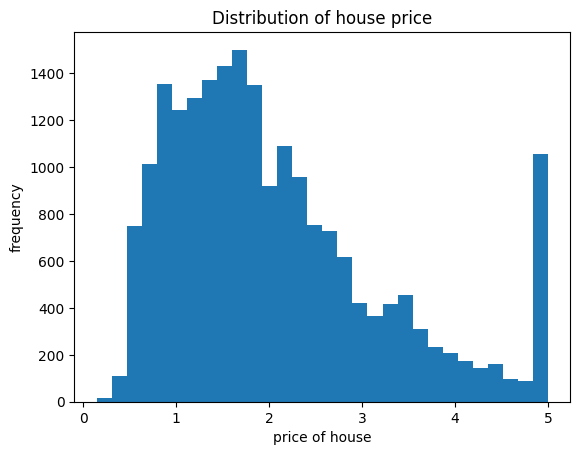

In [12]:
plt.hist(df['price'],bins=30)

plt.title('Distribution of house price')
plt.xlabel('price of house')
plt.ylabel('frequency')

Text(0.5, 1.0, 'heatmap to check relationship')

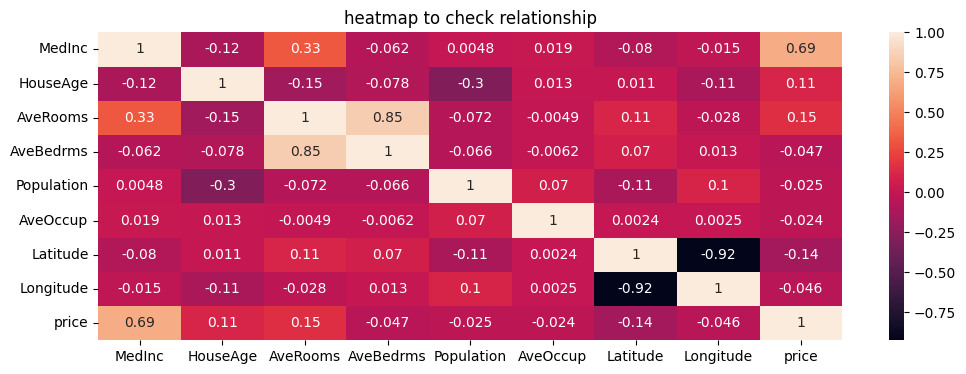

In [13]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)
plt.title('heatmap to check relationship')

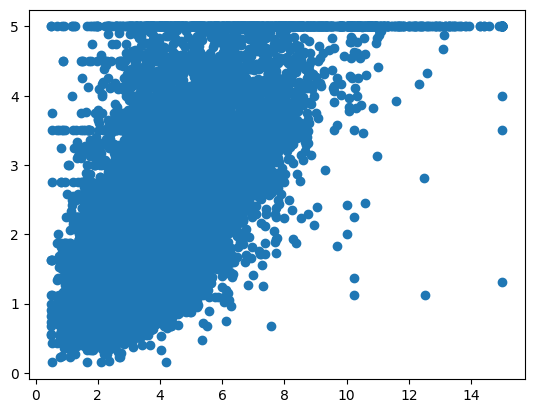

In [14]:
plt.scatter(df['MedInc'],df['price'])

# Insights

- insights needed for machine learning later
- get more insights and record them
- 

In [15]:
import plotly.express as px
px.histogram(df['price'])

In [16]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [17]:
model = LinearRegression()

In [18]:
model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# Training
- train test split of data

In [19]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y_cuba2 = df[['price']].loc[14999:]

In [22]:
x =df[['MedInc'	,'HouseAge',	'AveRooms'	,'AveBedrms'	,'Population'	,'AveOccup'	,'Latitude'	,'Longitude']]
y = df['price']

In [23]:
x_train = x.loc[0:14999]
y_train = y.loc[0:14999]

x_test = x.loc[14999:20641]
y_test = y.loc[14999:20641]


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2,random_state=42)

In [25]:
x_train.shape
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [26]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [27]:
#fit the data in the model

model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
y = model.coef_         #([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,
        # 7.83144907e-01, -2.02962058e-06, -3.52631849e-03,
       # -4.19792487e-01, -4.33708065e-01])
y

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [29]:
feature_importance = pd.DataFrame({
'Features': housing_data.feature_names, 
'Model Coefficients': model.coef_
}).sort_values('Model Coefficients', ascending =  False)

feature_importance

,Features,Model Coefficients
3,AveBedrms,0.783145
0,MedInc,0.448675
1,HouseAge,0.009724
4,Population,-0.000002
5,AveOccup,-0.003526
2,AveRooms,-0.123323
6,Latitude,-0.419792
7,Longitude,-0.433708


# Testing

In [30]:
y_predict = model.predict(x_test)
y_predict

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

# Evaluation 

In [31]:
from sklearn.metrics import mean_absolute_error,r2_score

In [32]:
r2 = r2_score(y_test,y_predict)     #0.58           #
r2

0.575787706032451

In [33]:
mean = mean_absolute_error(y_test,y_predict)        #0.53
mean

0.5332001304956555

# activity

- house price
- tips dataset
- take the numeric column only - input features
- linear regression on them
- target features

In [34]:
tips = sns.load_dataset('tips')

In [43]:
df = pd.DataFrame(tips)

In [77]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
x,y =  pd.factorize(df['sex'])
df['sex_factorized'] = x

,total_bill,tip,sex,smoker,day,time,size,sex_factorized
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [91]:
x,y =  pd.factorize(df['day'])
df['day_factorized'] = x

In [93]:
x,y =  pd.factorize(df['time'])
df['time_factorized'] = x

In [94]:
df

,total_bill,tip,sex,smoker,day,time,size,sex_factorized,smoker_factorized,day_factorized,time_factorized
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,0,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,0,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,0,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,1,0


In [95]:
x = df[['total_bill',	'size',	'sex_factorized',	'smoker_factorized',	'day_factorized',	'time_factorized']]
y = df["tip"]

In [96]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

195.20000000000002

In [48]:
xx = 0.8 * 244  # 195
yy = 244 - 195 # 49
yy

49

In [97]:
x_train = x.loc[:194]
y_train = y.loc[:194]

x_test = x.loc[195:]
y_test = y.loc[195:]

In [99]:
y_test

195    1.44
196    2.00
197    5.00
198    2.00
199    2.00
200    4.00
201    2.01
202    2.00
203    2.50
204    4.00
205    3.23
206    3.41
207    3.00
208    2.03
209    2.23
210    2.00
211    5.16
212    9.00
213    2.50
214    6.50
215    1.10
216    3.00
217    1.50
218    1.44
219    3.09
220    2.20
221    3.48
222    1.92
223    3.00
224    1.58
225    2.50
226    2.00
227    3.00
228    2.72
229    2.88
230    2.00
231    3.00
232    3.39
233    1.47
234    3.00
235    1.25
236    1.00
237    1.17
238    4.67
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, dtype: float64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   total_bill         244 non-null    float64 
 1   tip                244 non-null    float64 
 2   sex                244 non-null    category
 3   smoker             244 non-null    category
 4   day                244 non-null    category
 5   time               244 non-null    category
 6   size               244 non-null    int64   
 7   sex_factorized     244 non-null    int64   
 8   smoker_factorized  244 non-null    int64   
 9   day_factorized     244 non-null    int64   
 10  time_factorized    244 non-null    int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 15.0 KB


In [102]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2,random_state=42)

In [104]:
x_train.shape

(195, 6)

In [105]:
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mae         #0.67

r2 = r2_score(y_test,y_pred)
r2              # 0.44

0.44417104879050395